In [73]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
df = pd.read_csv('yield_df.csv')

In [75]:
df.head()

,Unnamed: 0,area,item,year,yield,avg_rain,fertilizer,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [76]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [77]:
df.shape

(28242, 7)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area        28242 non-null  object 
 1   item        28242 non-null  object 
 2   year        28242 non-null  int64  
 3   yield       28242 non-null  int64  
 4   avg_rain    28242 non-null  float64
 5   fertilizer  28242 non-null  float64
 6   avg_temp    28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [79]:
df.isnull().sum()

area          0
item          0
year          0
yield         0
avg_rain      0
fertilizer    0
avg_temp      0
dtype: int64

In [80]:
df.duplicated().sum()

2310

In [81]:
df.drop_duplicates(inplace=True)

In [82]:
df.duplicated().sum()

0

# Transforming average rainfall
In summary, this code identifies the indices of rows in the DataFrame df where the values in the column 'avg_rain' are not numeric strings. These rows can be considered for removal or further processing, depending on the specific use case.

In [83]:
def isStr(obj):
    try:
        float(obj)
        return False
    except:
        return True
to_drop = df[df['avg_rain'].apply(isStr)].index

In [84]:
df = df.drop(to_drop)

In [85]:
df

,area,item,year,yield,avg_rain,fertilizer,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [86]:
df['avg_rain'] = df['avg_rain'].astype(np.float64)

# Graph Frequency vs Area

In [87]:
len(df['area'].unique())

101

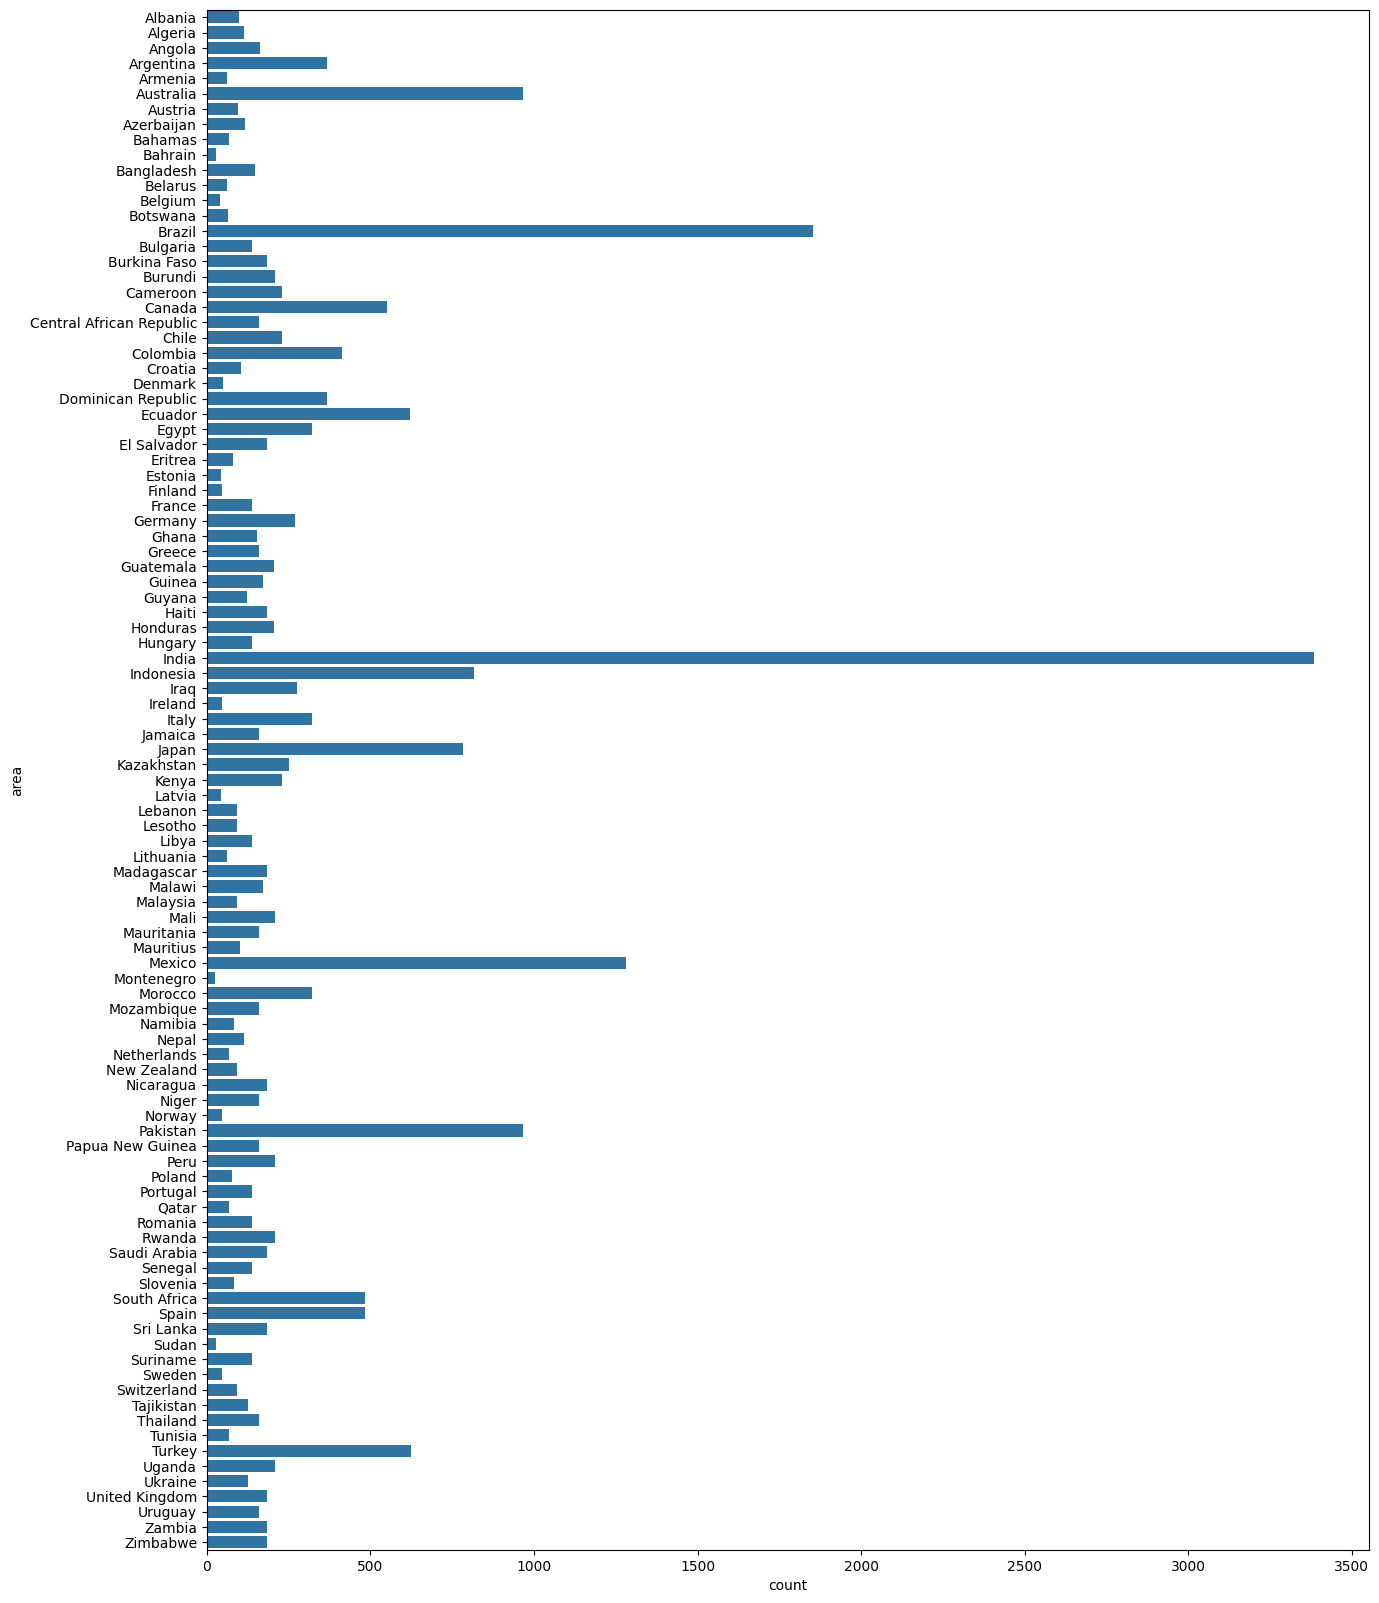

In [88]:
plt.figure(figsize=(15,20))
sns.countplot(y=df['area'])
plt.show()

In [89]:
(df['area'].value_counts() < 500).sum()

91

# yield_per_country

In [90]:
country = df['area'].unique()
yield_per_country = []
for state in country:
    yield_per_country.append(df[df['area']==state]['yield'].sum())


In [91]:
df['yield'].sum()

1996196943

In [92]:
yield_per_country

[5711536,
 6711464,
 5722563,
 32864032,
 4524100,
 109111062,
 10852258,
 4608380,
 4384717,
 4443889,
 7720159,
 4704812,
 8442270,
 470651,
 136340329,
 6263075,
 6083337,
 7031146,
 10717883,
 34706922,
 4255627,
 20561214,
 26927138,
 6083167,
 10701651,
 25312166,
 21315591,
 36828848,
 16855944,
 1452416,
 3595638,
 6210668,
 15790618,
 38780463,
 9260371,
 14571925,
 16508723,
 7975743,
 8361103,
 8619194,
 10920131,
 8824110,
 274219558,
 68067328,
 10984722,
 9104030,
 32280700,
 19698007,
 100924145,
 9965212,
 14391737,
 3698588,
 6956804,
 4258932,
 9016288,
 4174348,
 6103523,
 8346715,
 7934982,
 15106720,
 4465841,
 12684212,
 113698872,
 1645100,
 22173010,
 6964027,
 3165475,
 4113713,
 14086433,
 17657728,
 12819227,
 12316327,
 6721305,
 49264956,
 10729929,
 15201910,
 6564711,
 12154347,
 5995626,
 6006156,
 7741053,
 15171886,
 10342677,
 7197013,
 30999849,
 46773540,
 11217741,
 1896346,
 14786468,
 8620653,
 13336346,
 6295210,
 9511720,
 3724246,
 52263950,
 

# Yield Per Country Graph

<Axes: >

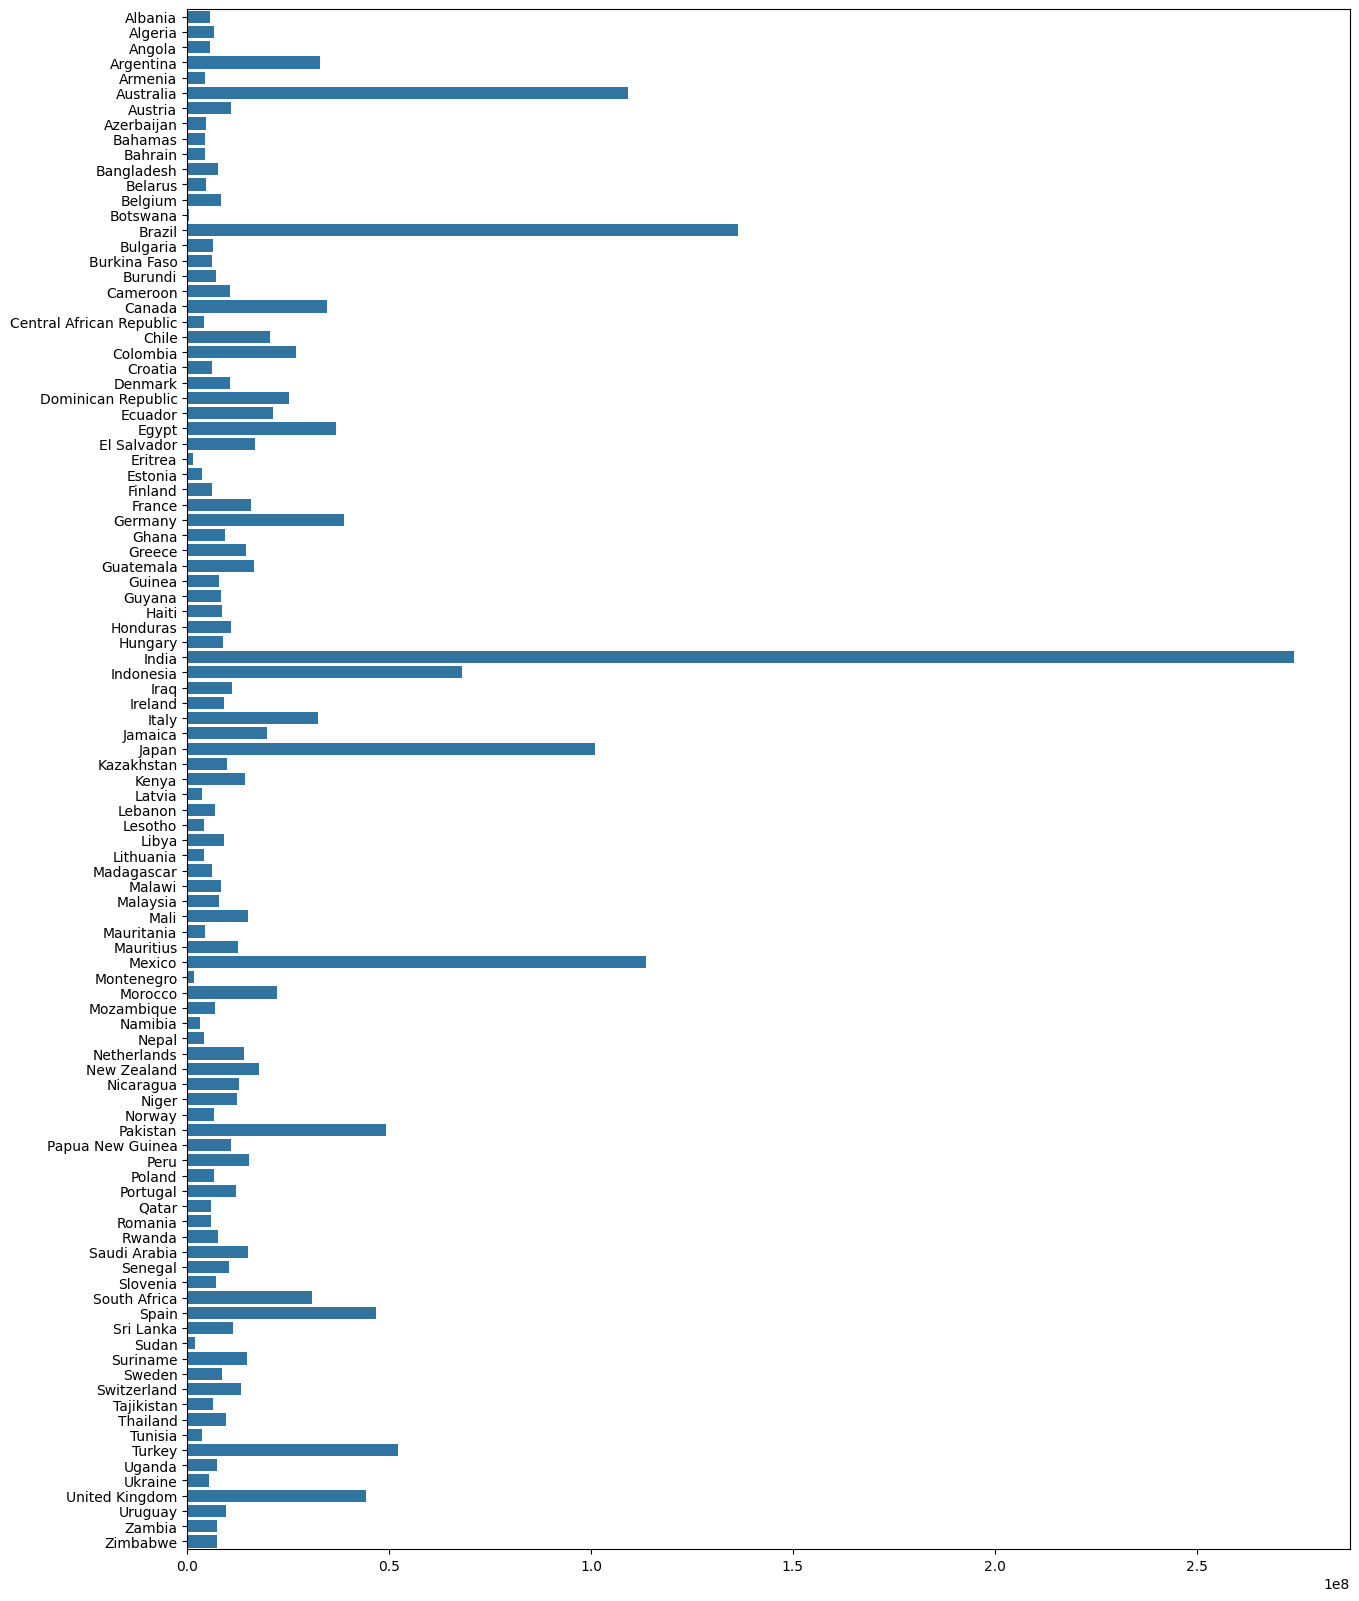

In [93]:
plt.figure(figsize=(15, 20))
sns.barplot(y=country, x=yield_per_country)

# Graph Frequency vs Item

<Axes: xlabel='count', ylabel='item'>

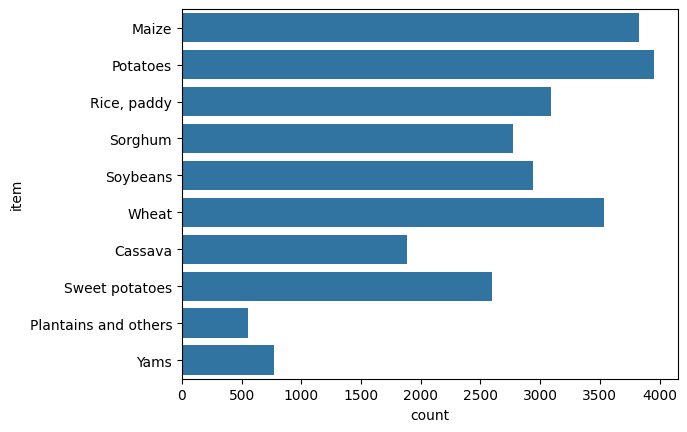

In [94]:
sns.countplot(y=df['item'])

# Yield Vs Item

In [95]:
crops = df['item'].unique()
per_crop_yield = []
for c in crops:
    per_crop_yield.append(df[df['item']==c]['yield'].sum())

<Axes: >

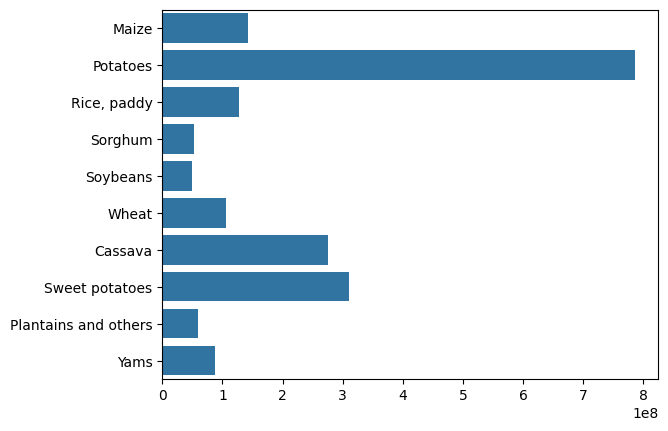

In [96]:
sns.barplot(y=crops,x=per_crop_yield)

# Train Test split Rearranging Columns

In [97]:
col = ['year', 'avg_rain','fertilizer', 'avg_temp', 'area', 'item', 'yield']
df = df[col]
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [98]:
df.head(3)

,year,avg_rain,fertilizer,avg_temp,area,item,yield
0,1990,1485.0,121.0,16.37,Albania,Maize,36613
1,1990,1485.0,121.0,16.37,Albania,Potatoes,66667
2,1990,1485.0,121.0,16.37,Albania,"Rice, paddy",23333


In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, shuffle=True)

# Converting Categorical to Numerical and Scaling the values

In [100]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
ohe = OneHotEncoder(drop='first')
scale = StandardScaler()

preprocesser = ColumnTransformer(
        transformers = [
            ('StandardScale', scale, [0, 1, 2, 3]),
            ('OHE', ohe, [4, 5]),
        ],
        remainder='passthrough'
)

In [101]:
X_train_dummy = preprocesser.fit_transform(X_train)
X_test_dummy = preprocesser.transform(X_test)

In [102]:
preprocesser.get_feature_names_out(col[:-1])

array(['StandardScale__year', 'StandardScale__avg_rain',
       'StandardScale__fertilizer', 'StandardScale__avg_temp',
       'OHE__area_Algeria', 'OHE__area_Angola', 'OHE__area_Argentina',
       'OHE__area_Armenia', 'OHE__area_Australia', 'OHE__area_Austria',
       'OHE__area_Azerbaijan', 'OHE__area_Bahamas', 'OHE__area_Bahrain',
       'OHE__area_Bangladesh', 'OHE__area_Belarus', 'OHE__area_Belgium',
       'OHE__area_Botswana', 'OHE__area_Brazil', 'OHE__area_Bulgaria',
       'OHE__area_Burkina Faso', 'OHE__area_Burundi',
       'OHE__area_Cameroon', 'OHE__area_Canada',
       'OHE__area_Central African Republic', 'OHE__area_Chile',
       'OHE__area_Colombia', 'OHE__area_Croatia', 'OHE__area_Denmark',
       'OHE__area_Dominican Republic', 'OHE__area_Ecuador',
       'OHE__area_Egypt', 'OHE__area_El Salvador', 'OHE__area_Eritrea',
       'OHE__area_Estonia', 'OHE__area_Finland', 'OHE__area_France',
       'OHE__area_Germany', 'OHE__area_Ghana', 'OHE__area_Greece',
       'OHE__a

# Let's train our model

In [103]:
#linear regression
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error


models = {
    'lr':LinearRegression(),
    'lss':Lasso(),
    'Rid':Ridge(),
    'Dtr':DecisionTreeRegressor(),
    'knn':KNeighborsRegressor(),
    'Rdf':RandomForestRegressor()
}
for name, md in models.items():
    md.fit(X_train_dummy,y_train)
    y_pred = md.predict(X_test_dummy)
    
    print(f"{name} : mae : {mean_absolute_error(y_test,y_pred)} score : {r2_score(y_test,y_pred)} mse: {mean_squared_error(y_test, y_pred)}")

lr : mae : 29907.447350409722 score : 0.7473125540079992 mse: 1817342943.5139735


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67280771830.0, tolerance: 14848622817.505169
  model = cd_fast.sparse_enet_coordinate_descent(


lss : mae : 29893.99762450549 score : 0.7473261756207235 mse: 1817244976.0757167
Rid : mae : 29864.85302468091 score : 0.7473042393527811 mse: 1817402743.0023456
Dtr : mae : 3919.1258916522074 score : 0.9799389353488684 mse: 144280354.4908425
knn : mae : 4616.9047619047615 score : 0.9849925066819024 mse: 107934772.83529592
Rdf : mae : 3690.1088876036247 score : 0.9876732820778741 mse: 88654478.83458315


# Select model

In [104]:
Rdf = RandomForestRegressor()
Rdf.fit(X_train_dummy,y_train)
Rdf.predict(X_test_dummy)

array([37850.21, 24255.93, 21459.59, ..., 21735.23, 34857.25, 92438.09])

# Predictive System

In [105]:
def prediction(Year, avg_rain, fertlizer, avg_temp, Area, Item):
    features = np.array([[Year, avg_rain, fertlizer, avg_temp, Area, Item]], dtype=object)
    transformed_features = preprocesser.transform(features)
    predicted_yield = Rdf.predict(transformed_features).reshape(1, -1)

    return predicted_yield[0]

Year = 1990
avg_rain =1485.0
fertlizer = 121.00
avg_temp = 16.37                   
Area = 'India'
Item = 'Maize'
result = prediction(Year, avg_rain, fertlizer, avg_temp, Area, Item)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [106]:
result

array([30655.96])

# Pickle Files

In [107]:
import pickle
pickle.dump(Rdf,open('rdf.pkl','wb'))
pickle.dump(preprocesser,open('preprocessor.pkl','wb'))

In [108]:
import sklearn
print(sklearn.__version__)

1.3.2
